In [1]:
!pwd

/Users/ashish1610dhiman/data_projects/bestbuy/notebooks/ashish


In [2]:
import sys
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

sys.version

'3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:55:37) \n[Clang 14.0.6 ]'

In [3]:
%load_ext autoreload 
%autoreload 2

In [4]:
import statsmodels.api as sm

### Test on one sku

In [5]:
train_test = pd.read_csv("../../data/train_validation_marker.csv")
train_test["SALES_DATE"] = pd.to_datetime(train_test["SALES_DATE"])
train_test.shape

(846632, 15)

In [6]:
#clean train/test
train = train_test[(train_test.validation==False) & (train_test.validation_clean==True)]
validation = train_test[(train_test.validation==True) & (train_test.validation_clean==True)]
train.shape,validation.shape

((797490, 15), (3815, 15))

<AxesSubplot: xlabel='SALES_DATE'>

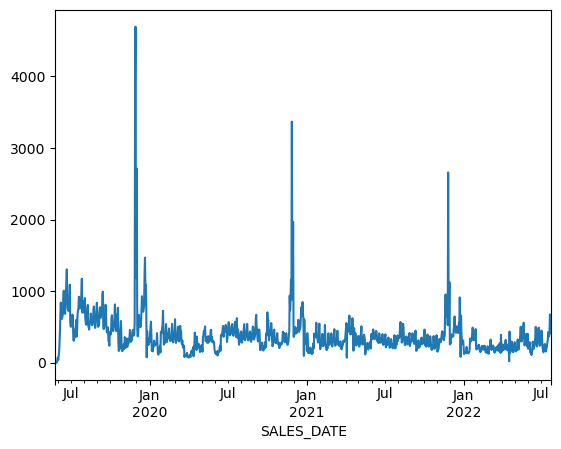

In [7]:
sku_id = 469
train_sku = train[train.Encoded_SKU_ID == sku_id]
validation_sku = validation[validation.Encoded_SKU_ID == sku_id]

train_sales_sku = train_sku["DAILY_UNITS"]
train_sales_sku.index = train_sku["SALES_DATE"]
train_sales_sku = train_sales_sku.sort_index()
train_sales_sku.plot()

/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


14035.145732406949 14105.83530018453


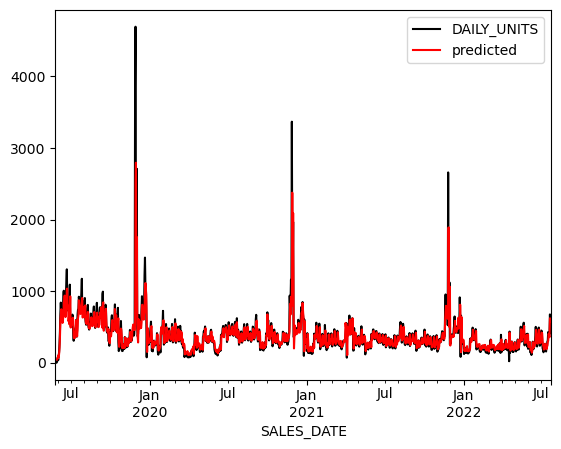

In [8]:
# Fit the model
# (a switching mean is the default of the MarkovRegession model)
model0 = sm.tsa.MarkovAutoregression(train_sales_sku, order = 4,\
                                     k_regimes=2, switching_variance = True, switching_exog = True)
res_model0 = model0.fit()
print(res_model0.aic,res_model0.bic)
ax1 = train_sales_sku.plot(color="black")
res_model0.predict().plot(ax= ax1, color = "r", label = "predicted")
plt.legend()

In [9]:
from statsmodels.tsa.api import STLForecast

In [15]:
stlf = STLForecast(train_sales_sku, sm.tsa.MarkovAutoregression, model_kwargs={"k_regimes": 2, "order":4})
res_stlf = stlf.fit()

/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/statsmodels/tsa/statespace/tools.py:538: RuntimeWarning: invalid value encountered in sqrt
  x = r / ((1 - r**2)**0.5)
/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/statsmodels/tsa/statespace/tools.py:497: RuntimeWarning: invalid value encountered in divide
  r = unconstrained/((1 + unconstrained**2)**0.5)
/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
res_stlf.forecast(12)

NotImplementedError: 

In [ ]:
res_model0.smoothed_marginal_probabilities[0]

In [ ]:
res_model0.regime_transition

### Predict function

In [ ]:
#
tr_prob_00 = res_model0.regime_transition[0,0] 
tr_prob_01 = res_model0.regime_transition[0,1]
tr_prob_10 = res_model0.regime_transition[1,0] 
tr_prob_11 = res_model0.regime_transition[1,1]
tr_prob_00,tr_prob_01

In [ ]:
res_model0.params

In [ ]:
def eqn0(l1,l2,l3,l4,params1):
     y = params1["const[0]"] + l1*params1["ar.L1[0]"] + l2*params1["ar.L2[0]"] +\
        + l3*params1["ar.L3[0]"] + l4*params1["ar.L4[0]"]

In [ ]:
eqn0 = lambda l1,l2,l3,l4,params1: params1["const[0]"] + l1*params1["ar.L1[0]"] + l1*params1["ar.L1[0]"]

In [ ]:
dir(res_model0)

In [ ]:
dir(res_model0.smoother_results)

In [ ]:
dir(res_model0)

In [ ]:
def ad_predict(model):
    

In [ ]:
train_sales_sku.diff().dropna().plot()

In [ ]:
# Fit the model
# (a switching mean is the default of the MarkovRegession model)
model0a = sm.tsa.MarkovRegression(train_sales_sku.diff().dropna(), k_regimes=2, switching_variance = True)
res_model0a = model0a.fit()
res_model0a.aic,res_model0a.bic

In [ ]:
res_model0a.summary()

In [ ]:
dir(res_model0a)

In [ ]:
res_model0a.predict(start = 100, end = 1155+7)

In [ ]:
validation["SALES_DATE"].min()

In [ ]:
res_model0.predict(start=len(train_sales_sku),end=len(train_sales_sku)+1)

In [ ]:
# Fit the model
mod_fedfunds2 = sm.tsa.MarkovRegression(
    dta_fedfunds.iloc[1:], k_regimes=2, exog=dta_fedfunds.iloc[:-1]
)
res_fedfunds2 = mod_fedfunds2.fit()